# Titanic

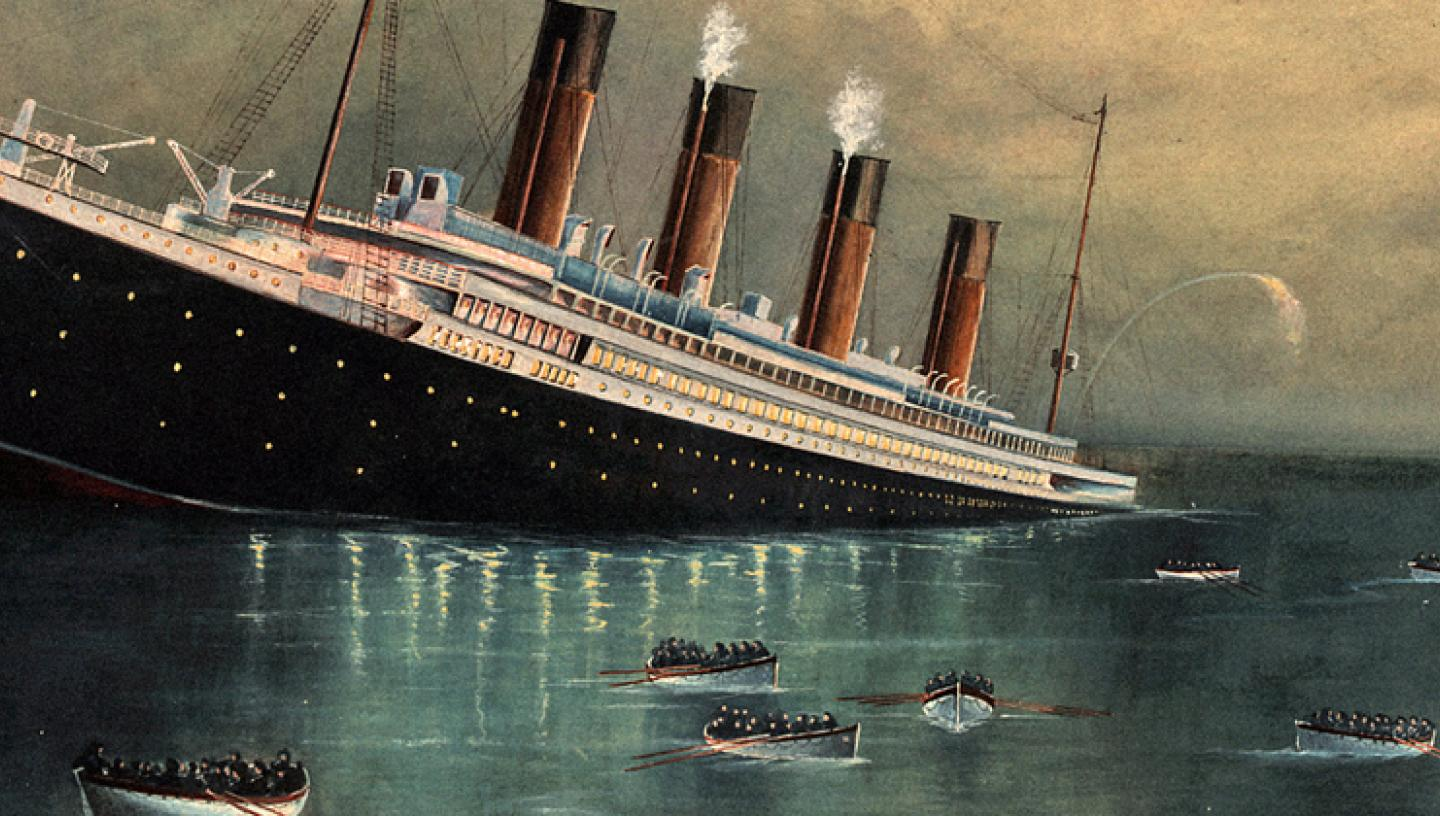

## Import library

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder, MinMaxScaler,StandardScaler
import category_encoders as ce
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

#### Variables Description

    1. PassengerID : ID of the Passenger.
    2. Survived: Survival (0 = No; 1 = Yes)
    3. Pclass: Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
    4. Name : Name of the Passenger
    5. Sex: Sex of the Passenger (Female / Male)
    6. Age: Age of the Passenger.
    7. Sibsp: Number of siblings/spouses aboard
    8. Parch: Number of parents/children aboard
    9. Ticket : Ticket number.
    10. Fare: Passenger fare (British pound)
    11. Cabin: Cabin number
    12. Embarked: Port of embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)


## Understand Data

In [2]:
data = pd.DataFrame(pd.read_csv("Titanic.csv"))
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [4]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [5]:
data.shape

(418, 12)

## Cleaning Data

In [6]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [7]:
data['Age'] = data['Age'].fillna(data['Age'].mean())
data['Fare'] = data['Fare'].fillna(data['Fare'].mean())

In [8]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [9]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [10]:
data['Age'] = data['Age'].astype(int)

In [11]:
data['Fare'] = data['Fare'].astype(int)

In [12]:
data.dtypes

PassengerId     int64
Survived        int64
Pclass          int64
Name           object
Sex            object
Age             int32
SibSp           int64
Parch           int64
Ticket         object
Fare            int32
Cabin          object
Embarked       object
dtype: object

In [13]:
Titanic = data.drop(['PassengerId','Name','Cabin','Ticket'], axis =1)

In [14]:
Titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34,0,0,7,Q
1,1,3,female,47,1,0,7,S
2,0,2,male,62,0,0,9,Q
3,0,3,male,27,0,0,8,S
4,1,3,female,22,1,1,12,S


In [15]:
Titanic.tail()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
413,0,3,male,30,0,0,8,S
414,1,1,female,39,0,0,108,C
415,0,3,male,38,0,0,7,S
416,0,3,male,30,0,0,8,S
417,0,3,male,30,1,1,22,C


## Data Viz

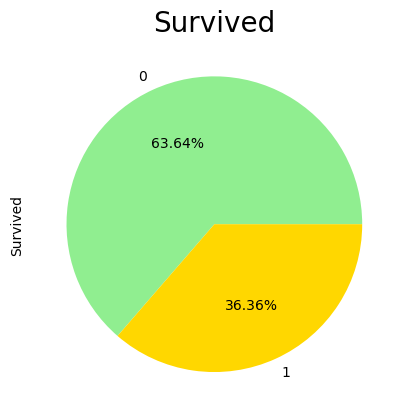

In [16]:
colors = ['lightgreen','gold']
ax = Titanic['Survived'].value_counts().plot.pie(autopct='%1.2f%%',colors=colors);
ax.set_title(label = "Survived", fontsize = 20);

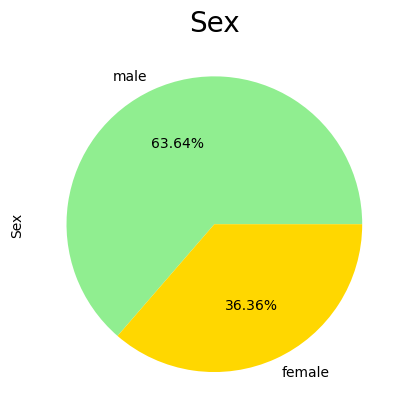

In [17]:
colors = ['lightgreen','gold']
ax = Titanic['Sex'].value_counts().plot.pie(autopct='%1.2f%%',colors=colors);
ax.set_title(label = "Sex", fontsize = 20);

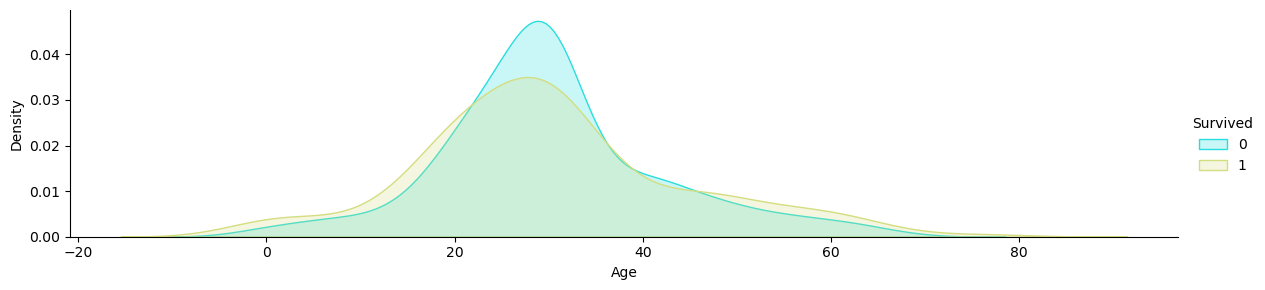

In [18]:
ax = sns.FacetGrid(Titanic, hue="Survived",aspect=4,palette='rainbow');
ax = ax.map(sns.kdeplot, 'Age', shade=True)
ax = ax.add_legend()

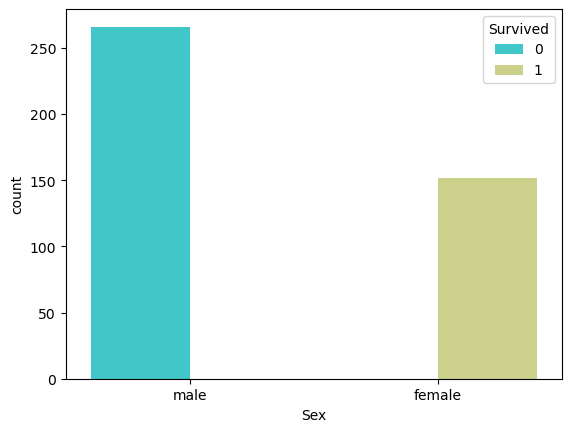

In [19]:
sns.countplot(data = Titanic,x= 'Sex',hue='Survived',palette='rainbow')
plt.show()

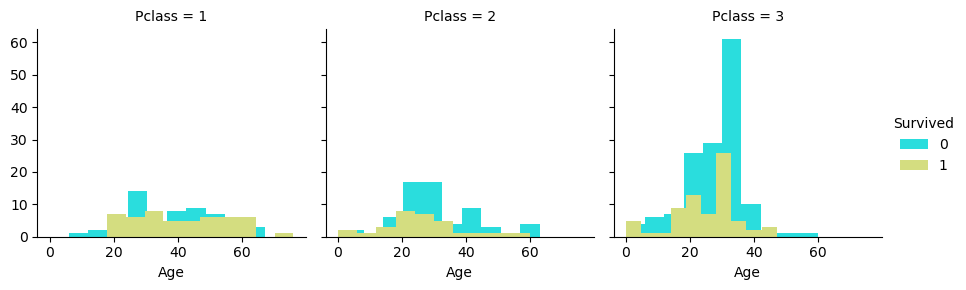

In [20]:
ax = sns.FacetGrid(Titanic, col="Pclass", hue="Survived",palette='rainbow')
ax = ax.map(plt.hist, "Age")
ax = ax.add_legend()

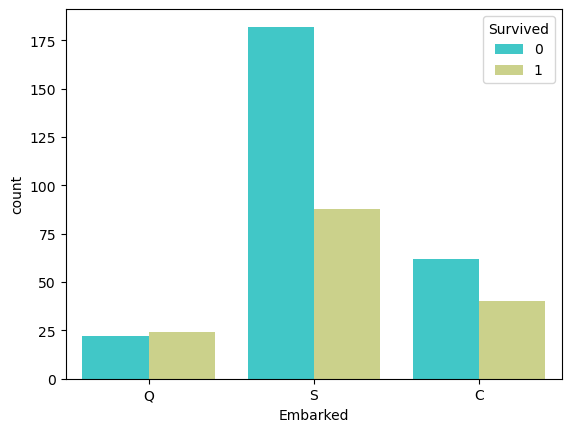

In [21]:
sns.countplot(data = Titanic,x= 'Embarked',hue='Survived',palette='rainbow')
plt.show()

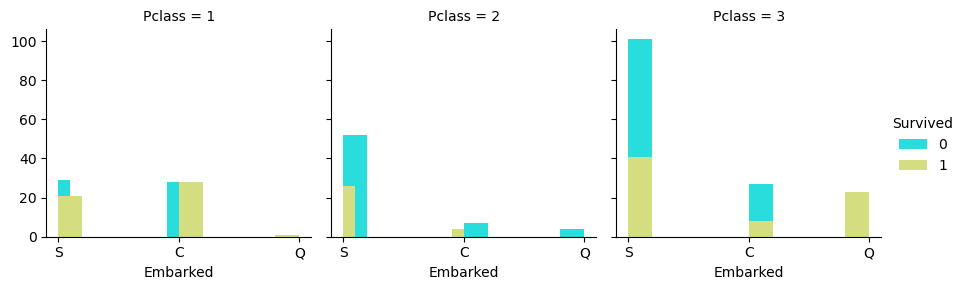

In [22]:
ax = sns.FacetGrid(Titanic, col="Pclass", hue="Survived",palette='rainbow')
ax = ax.map(plt.hist, "Embarked")
ax = ax.add_legend()

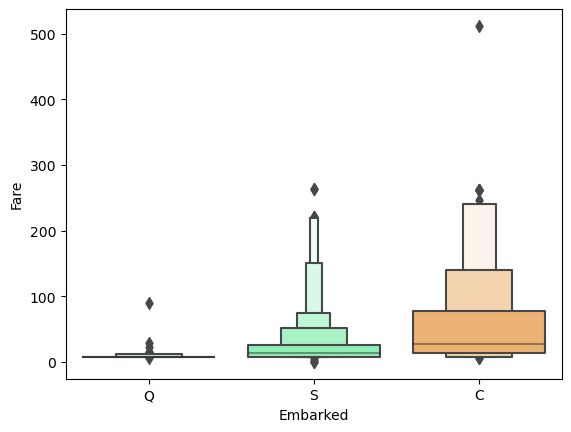

In [23]:
sns.boxenplot(y="Fare", x="Embarked", data=Titanic,palette='rainbow')
plt.show()

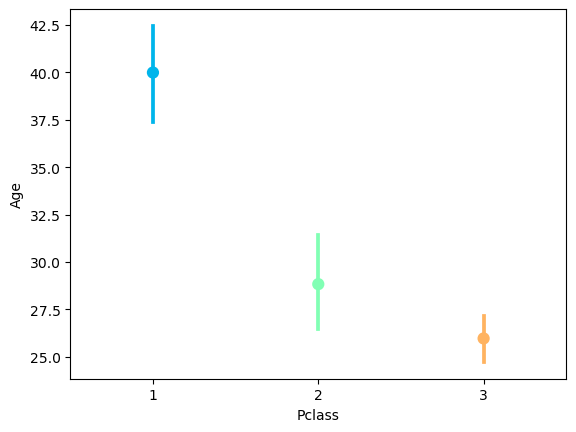

In [24]:
sns.pointplot(x="Pclass", y="Age", data=Titanic,palette='rainbow')
plt.show()

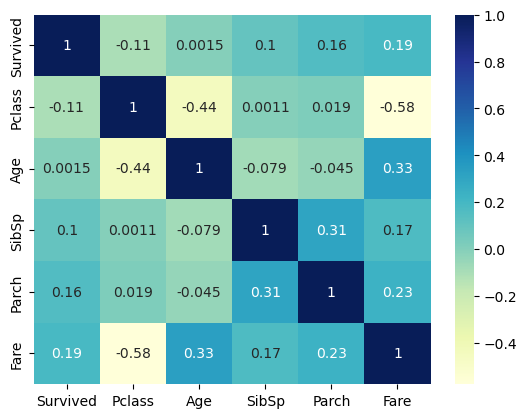

In [25]:
sns.heatmap(Titanic.corr(), cmap="YlGnBu", annot = True)
plt.show()

## SVM

In [26]:
encoder = ce.OrdinalEncoder(cols=['Survived','Pclass','Sex','Embarked'])
titanic_encoded = encoder.fit_transform(Titanic)
titanic_encoded.head()

D:\Anaconda\envs\Env1\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version. Use is_categorical_dtype instead.
  elif pd.api.types.is_categorical(cols):


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,1,1,34,0,0,7,1
1,2,1,2,47,1,0,7,2
2,1,2,1,62,0,0,9,1
3,1,1,1,27,0,0,8,2
4,2,1,2,22,1,1,12,2


In [27]:
X = titanic_encoded.drop(['Survived'],axis=1)
y = Titanic['Survived']

In [28]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3)

In [29]:
model = SVC(kernel = 'linear', random_state = 0)

# Model training
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(f"Accuracy score: {accuracy_score(y_test,y_pred)*100}%" )

Accuracy score: 100.0%


In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        75
           1       1.00      1.00      1.00        51

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126

